In [1]:
import seaborn as sns

In [4]:
# pip install uproot4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.3/362.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.0/864.0 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.4/636.4 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.9 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uproot4
import awkward as ak
import sklearn
from sklearn.utils import shuffle
from matplotlib.lines import Line2D
import math
import shap

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from itertools import chain

from tensorflow.keras import optimizers, initializers


from sklearn.utils import shuffle

import itertools
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

In [6]:
path_sig = '/content/sample_data/Phodiso/ML_sig.csv'

In [9]:
def open_root_csv(path):
    df = pd.read_csv(path)
    def convert_to_list(element):
        # Check if the element is a string and appears to be a list
        if isinstance(element, str) and element.startswith('[') and element.endswith(']'):
            try:
                # Convert string to list using ast.literal_eval
                converted = ast.literal_eval(element)
                # Ensure all elements are numbers (int or float)
                if isinstance(converted, list) and all(isinstance(x, (int, float)) for x in converted):
                    return converted
            except (ValueError, SyntaxError):
                pass
        return element  # Return the original element if conversion fails
    # Apply the conversion function to all elements in the DataFrame
    df_converted = df.applymap(convert_to_list)
    return df_converted

In [10]:
sig = open_root_csv(path_sig)

<ipython-input-9-5036b1c8e42c>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_converted = df.applymap(convert_to_list)


In [12]:
path_back = '/content/sample_data/Phodiso/ML_all_background.csv'

In [13]:
back = open_root_csv(path_back)

<ipython-input-9-5036b1c8e42c>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_converted = df.applymap(convert_to_list)


In [14]:
def plot_correlation(dataframe):

   # Compute correlation matrix
    corr_matrix = dataframe.corr()

    # Create a heatmap plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=False, cmap='inferno')

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

In [15]:
# Example usage:
sig_new = sig
back_new = back

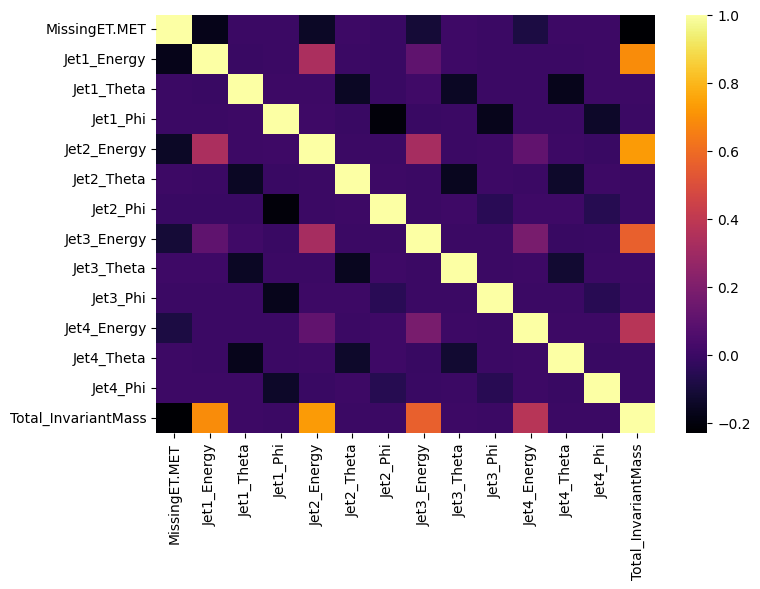

In [16]:
plot_correlation(sig_new)

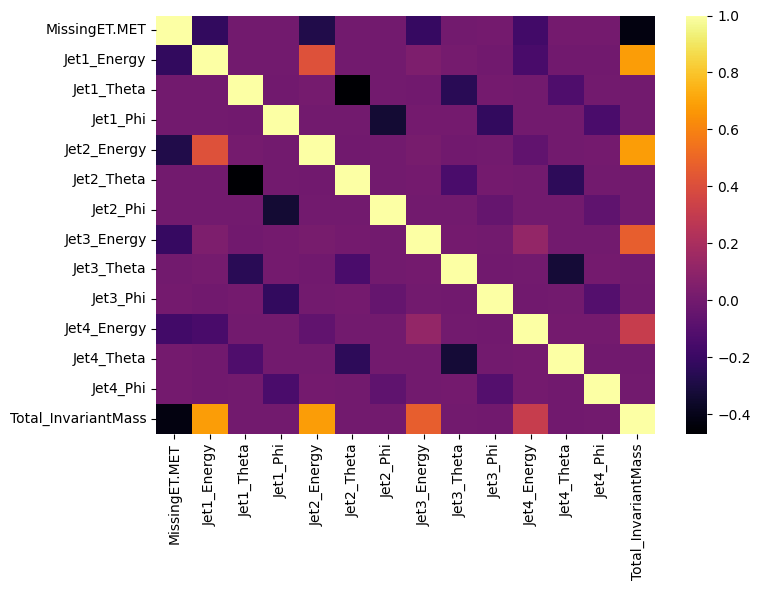

In [17]:
plot_correlation(back_new)

In [18]:
sig_new['label'] = 1
back_new['label'] = 0



In [19]:
# Combine data after labelling the data in preparation to train the model and drop #Nan values
df = pd.concat([sig_new,back_new]).sample(frac=1 ) .dropna()

In [20]:
X = df.drop(columns=['label'])
y = df['label']

In [21]:
dimensions = len(df.columns)-1
df[df['label']==0].shape, df[df['label']==1].shape

((64535, 15), (30764, 15))

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
initializer = tf.keras.initializers.RandomNormal()
initializer1 = tf.keras.initializers.HeUniform()
initializer2 = tf.keras.initializers.GlorotNormal()
initializer3 = tf.keras.initializers.GlorotUniform()
initializer4 = tf.keras.initializers.HeNormal()
initializer5 = tf.keras.initializers.RandomUniform()

In [24]:
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=dimensions,kernel_initializer=initializer4))
model.add(Dense(45, kernel_initializer=initializer4,activation='relu'))
model.add(Dense(40, kernel_initializer=initializer4,activation='relu'))
model.add(Dense(39, kernel_initializer=initializer4,activation='relu'))
model.add(Dense(36, kernel_initializer=initializer4,activation='relu'))
model.add(Dense(31, kernel_initializer=initializer4,activation='relu'))
model.add(Dense(29, kernel_initializer=initializer4,activation='relu'))
model.add(Dense(1, kernel_initializer=initializer4,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.0005253),metrics=['accuracy'])

history = model.fit(X_train,Y_train,epochs=100,batch_size=32,verbose=1,validation_split=0.2,shuffle=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7014 - loss: 0.7690 - val_accuracy: 0.7407 - val_loss: 0.4941
Epoch 2/100
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7619 - loss: 0.4803 - val_accuracy: 0.7590 - val_loss: 0.4825
Epoch 3/100
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7752 - loss: 0.4621 - val_accuracy: 0.7875 - val_loss: 0.4504
Epoch 4/100
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7818 - loss: 0.4502 - val_accuracy: 0.7830 - val_loss: 0.4664
Epoch 5/100
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7833 - loss: 0.4457 - val_accuracy: 0.7882 - val_loss: 0.4419
Epoch 6/100
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7882 - loss: 0.4418 - val_accuracy: 0.7887 - val_loss: 0.4367
Epoch 7/100
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7881 - loss: 0.4375 - val_accuracy: 0.7937 - val_loss: 0.4358
Epoch 8/100
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7922 - loss: 

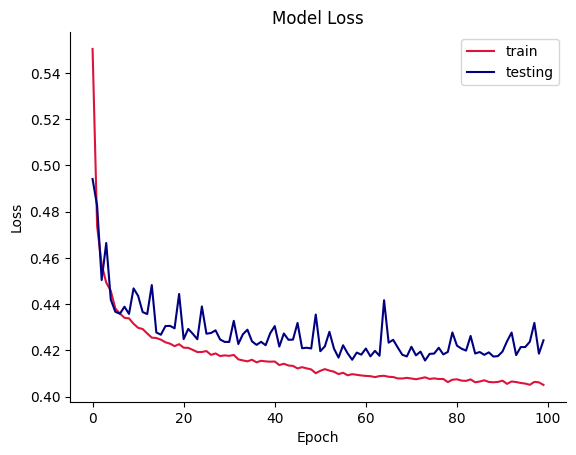

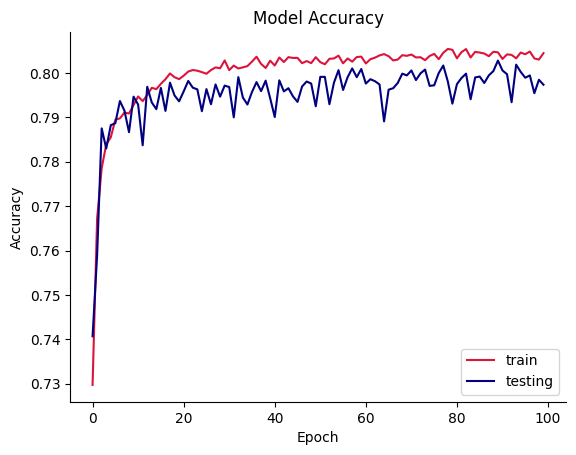

In [25]:
# plt.plot(history.history['loss'],"-")
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.tight_layout()
#

fig, ax1 = plt.subplots()

# Plotting the loss with specified colors
ax1.plot(history.history['loss'], color='crimson', label='train')  # Navy for training loss
ax1.plot(history.history['val_loss'], color='navy', label='testing')  # Purple for validation loss

# Setting the title and labels
ax1.set_title('Model Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')

# Adding a legend
ax1.legend(loc='upper right')

# Remove the top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


# Create a figure and ax2es
fig, ax2 = plt.subplots()

# Plotting accuracy with specified colors
ax2.plot(history.history['accuracy'], color='crimson', label=r'train')  # Navy for training accuracy
ax2.plot(history.history['val_accuracy'], color='navy', label=r'testing')  # Purple for validation accuracy

# Setting the title and labels
ax2.set_title('Model Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')

# Adding a legend
ax2.legend(loc='best')

# Remove the top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Enable grid if you want it, otherwise keep it as False
# ax2.grid(False)

# # Adjust layout and show the plot
# plt.tight_layout()

plt.show()

In [26]:
pred_train= model.predict(X_train)
pred_train= list(chain.from_iterable(pred_train))

scores= model.evaluate(X_train, Y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1]*100, 1 - scores[1]))

pred_test= model.predict(X_test)
pred_test= list(chain.from_iterable(pred_test))

scoresS2 = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scoresS2[1]*100, 1 - scoresS2[1]))

2383/2383 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Accuracy on training data: 80.25420308113098% 
 Error on training data: 0.19745796918869019
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy on test data: 80.24134039878845% 
 Error on test data: 0.19758659601211548


In [27]:
# Function to retrieve model results
def function1(label, probs):
    sig = []
    backG = []
    for i in range(len(probs)):
        if(label[i] == 1):
            sig.append(probs[i])

        elif(label[i] == 0):
            backG.append(probs[i])

    return sig,backG

In [1]:
Y_train = Y_train.to_list()
sig_training, back_training = function1(Y_train, pred_train)



In [31]:
Y_test = Y_test.to_list()
sig_testing,back_testing = function1(Y_test, pred_test)###test

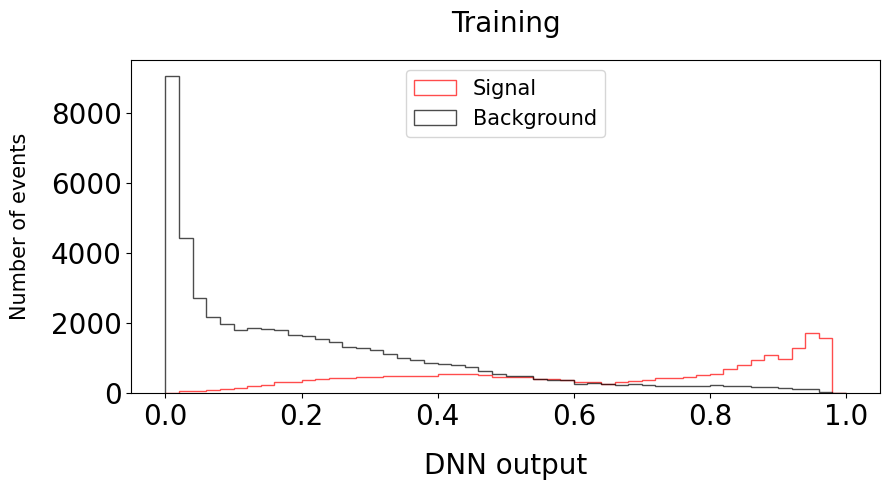

In [32]:
rng = np.random.default_rng(seed=123)

wei20 = np.ones_like(sig_training)
wei21 = np.ones_like(back_training)

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(sig_training, weights=wei20, bins=50, range=(0,1), histtype='step',edgecolor='red', linewidth=1, alpha=0.7, label='Signal')
ax.hist(back_training, weights=wei21, bins=50, range=(0,1), histtype='step', edgecolor='black', linewidth=1, alpha=0.7, label='Background')


# Add annotations
plt.ylabel('Number of events', fontsize=15, labelpad=15)
plt.xlabel('DNN output', fontsize=20, labelpad=15)
plt.title('Training', fontsize=20, pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=15, loc='upper center')
plt.tight_layout()
# plt.savefig('train_rmass_cut.pdf')
plt.show()

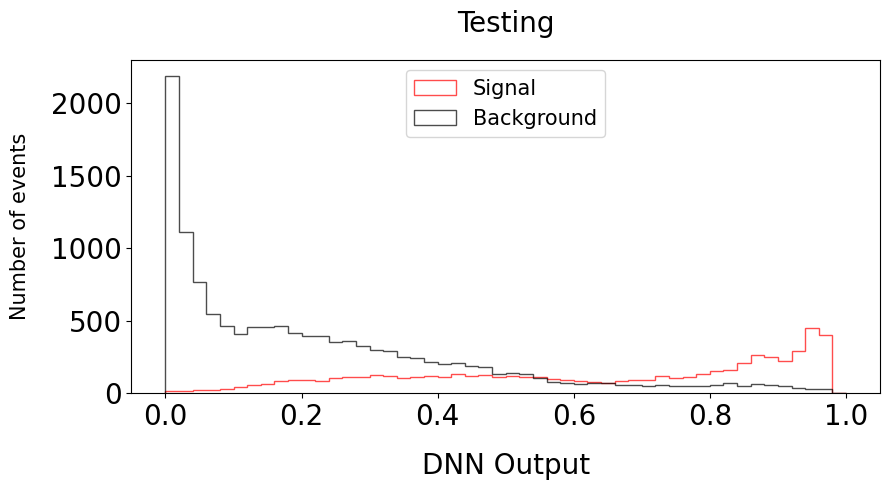

In [33]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

wei20t = np.ones_like(sig_testing)
wei21t = np.ones_like(back_testing)


# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(9, 5))

# Plotting histograms with specified colors
ax.hist(sig_testing, weights=wei20t, bins=50, range=(0, 1), histtype='step', linewidth=1, alpha=0.7, color='red', label='Signal')
ax.hist(back_testing, weights=wei21t, bins=50, range=(0, 1), histtype='step', linewidth=1, alpha=0.7, color='black', label='Background')

# Add annotations
ax.set_ylabel('Number of events', fontsize=15, labelpad=15)
ax.set_xlabel('DNN Output', fontsize=20, labelpad=15)
ax.set_title('Testing', fontsize=20, pad=20)

# Customize tick labels
ax.tick_params(axis='both', labelsize=20)

# Add a legend
ax.legend(fontsize=15, loc='upper center')

# Remove the top and right spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

wei20t = np.ones_like(sig_testing)
wei21t = np.ones_like(back_testing)

In [34]:
fpr_Test, tpr_Test, threshold = roc_curve(Y_test, pred_test)
fpr_Train, tpr_Train, threshold = roc_curve(Y_train, pred_train)

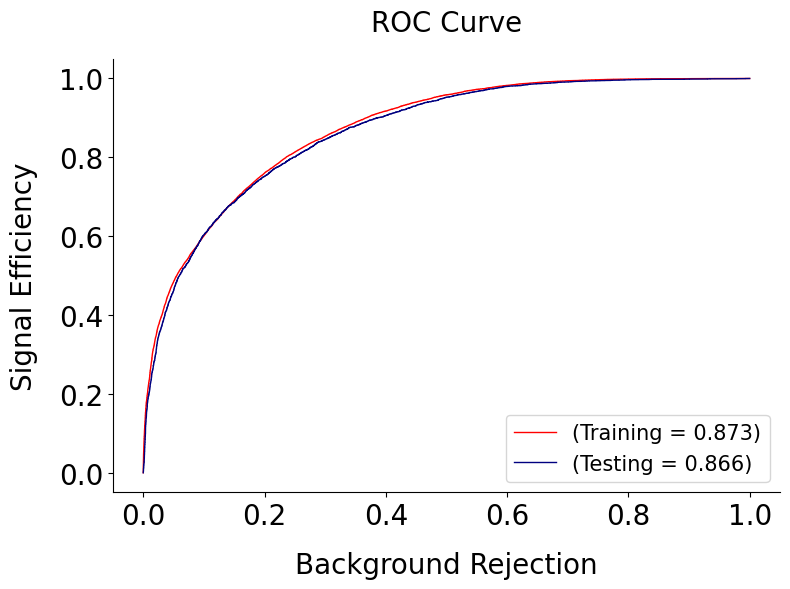

In [36]:
from matplotlib.lines import Line2D

auc_keras_Test = auc(fpr_Test, tpr_Test)
auc_keras_Train = auc(fpr_Train, tpr_Train)

# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the ROC curves with specified colors
ax.plot(fpr_Train, tpr_Train, linewidth=1, color='red', label='(Training = {:.3f})'.format(auc(fpr_Train, tpr_Train)))
ax.plot(fpr_Test, tpr_Test, linewidth=1, color='navy', label='(Testing = {:.3f})'.format(auc(fpr_Test, tpr_Test)))

# Add annotations
ax.set_ylabel('Signal Efficiency', fontsize=20, labelpad=15)  # Changed label for clarity
ax.set_xlabel('Background Rejection', fontsize=20, labelpad=15)  # Changed label for clarity
ax.set_title('ROC Curve', fontsize=20, pad=20)

# Customize tick labels
ax.tick_params(axis='both', labelsize=20)

# Add a legend
ax.legend(fontsize=15)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()